In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
trans_file = '/home/birniece/Documents/data/ANPERC_Lab/LargeRockBlock/DropBall_Test/big_rock_test3.csv'

In [3]:
df = pd.read_csv(trans_file, skiprows=9, index_col=0, header=None )
df.dropna(axis=1, inplace=True)
df.columns = ['R1','R2','R3','R4','R5','R6','R7','R8']
df.head()

,R1,R2,R3,R4,R5,R6,R7,R8
0,,,,,,,,
0.000000,0.007426,0.002663,0.002556,0.000796,0.002805,0.002847,0.001687,0.001655
0.000010,0.007375,0.002521,0.002400,0.000769,0.002738,0.002929,0.001645,0.001606
0.000019,0.007418,0.002586,0.002490,0.000831,0.002815,0.002959,0.001789,0.001649
0.000029,0.007509,0.002608,0.002549,0.000865,0.002732,0.002869,0.001669,0.001686
0.000038,0.007342,0.002509,0.002519,0.000733,0.002713,0.002797,0.001693,0.001665


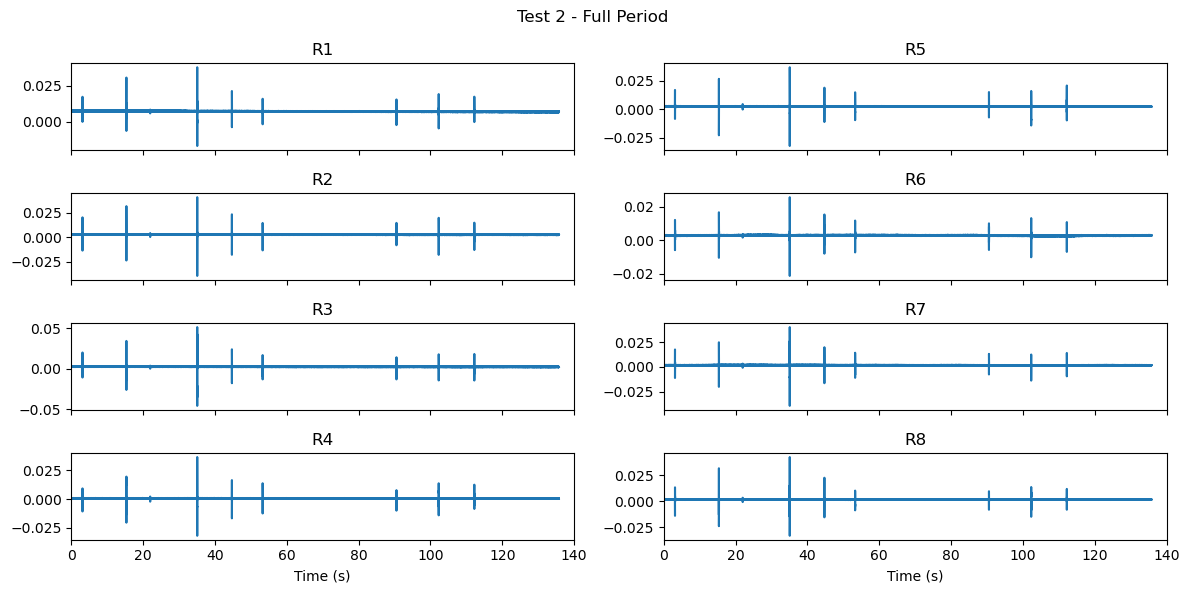

In [113]:
fig,axs = plt.subplots(4,2,figsize=[12,6], sharex=True)
axs[0,0].plot(df['R1'])
axs[1,0].plot(df['R2'])
axs[2,0].plot(df['R3'])
axs[3,0].plot(df['R4'])
axs[0,1].plot(df['R5'])
axs[1,1].plot(df['R6'])
axs[2,1].plot(df['R7'])
axs[3,1].plot(df['R8'])

axs[0,0].set_title('R1')
axs[1,0].set_title('R2')
axs[2,0].set_title('R3')
axs[3,0].set_title('R4')
axs[0,1].set_title('R5')
axs[1,1].set_title('R6')
axs[2,1].set_title('R7')
axs[3,1].set_title('R8')

for ax in axs[-1,:]:ax.set_xlabel('Time (s)'), ax.set_xlim([0,140])
    
fig.suptitle('Test 2 - Full Period ')
fig.tight_layout()

(-0.045, 0.045)

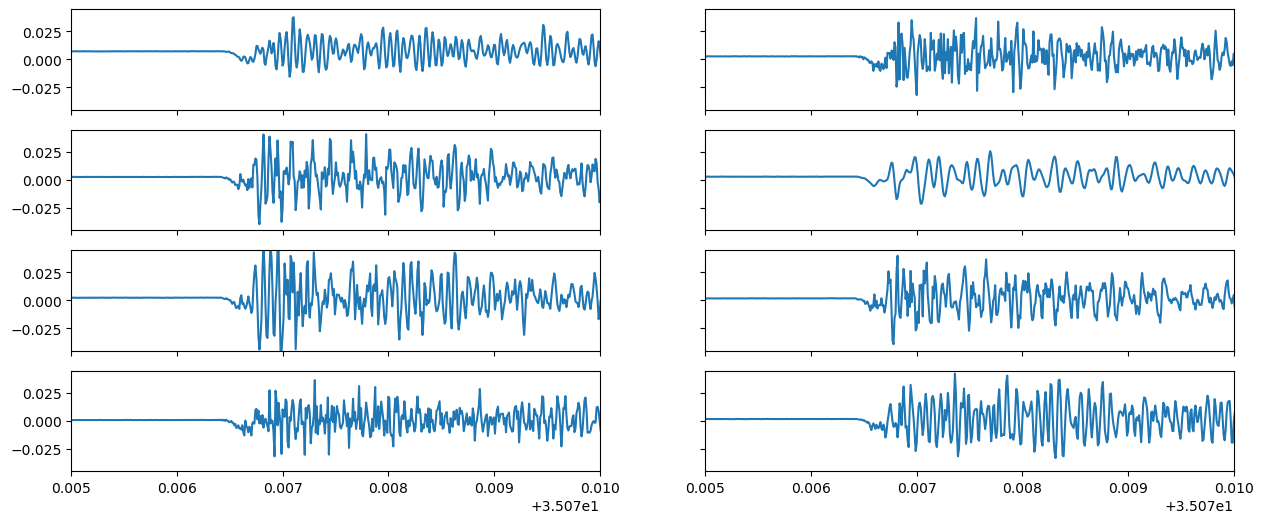

In [110]:
fig,axs = plt.subplots(4,2,figsize=[15,6], sharex=True, sharey=True)
axs[0,0].plot(df['R1'])
axs[1,0].plot(df['R2'])
axs[2,0].plot(df['R3'])
axs[3,0].plot(df['R4'])
axs[0,1].plot(df['R5'])
axs[1,1].plot(df['R6'])
axs[2,1].plot(df['R7'])
axs[3,1].plot(df['R8'])

axs[0,0].set_xlim([35.075,35.080])
axs[0,0].set_ylim([-.045, 0.045])

# FREQUENCY CHECK

(array([1.800000e+01, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 3.000000e+00, 4.495612e+06,
        9.000041e+06, 7.584050e+05]),
 array([9.5230e-06, 9.5231e-06, 9.5232e-06, 9.5233e-06, 9.5234e-06,
        9.5235e-06, 9.5236e-06, 9.5237e-06, 9.5238e-06, 9.5239e-06,
        9.5240e-06]),
 <BarContainer object of 10 artists>)

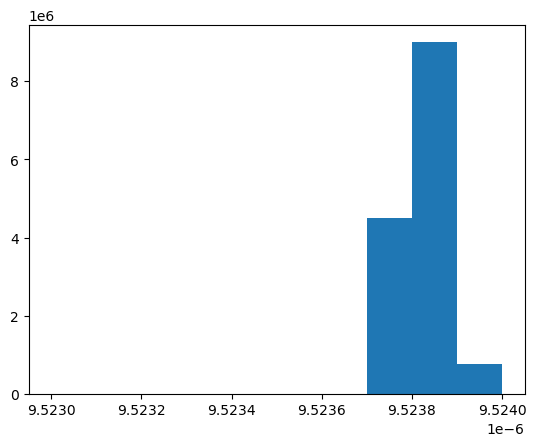

In [18]:
plt.hist(np.diff(df.index.values))

In [44]:
def return_spectrum(data, dt, fwin=1024):
    freq = np.fft.rfftfreq(fwin, d=dt)
    if len(data.shape)>1:
        spec = np.vstack([np.abs(np.fft.rfft(data[:, ix], n=fwin)) for ix in range(data.shape[1])])
    else:
        spec = np.abs(np.fft.rfft(data, n=fwin)) 
    return spec, freq

(0.0, 10.0)

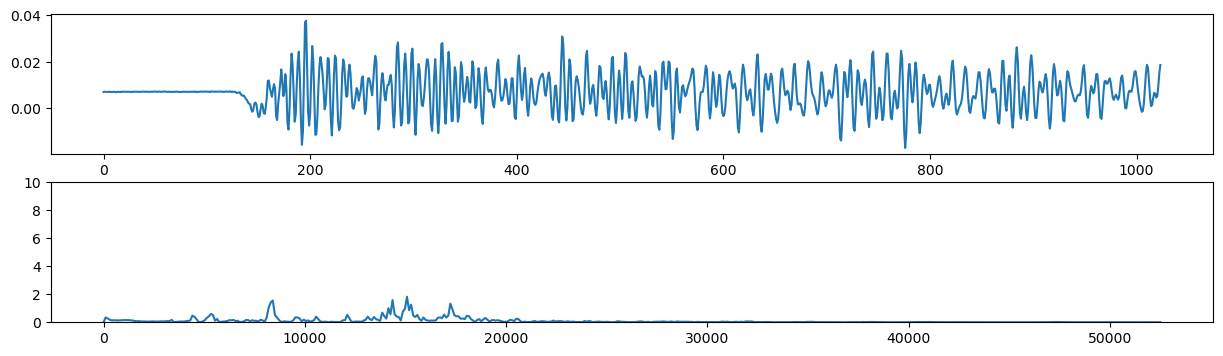

In [125]:
dt = np.mean(np.diff(df.index.values))
data = df['R1'].values

nfft = 2**10
start_time = int(3.6829e6)
end_time = int(start_time + nfft)
event_data = data[start_time:end_time]
o_spec, freq = return_spectrum(event_data, dt, fwin=nfft)

fig,axs = plt.subplots(2,1,figsize=[15,4])
axs[0].plot(event_data)
axs[1].plot(freq,spec)
# axs[1].set_xlim(1,1000)
axs[1].set_ylim(0,10)

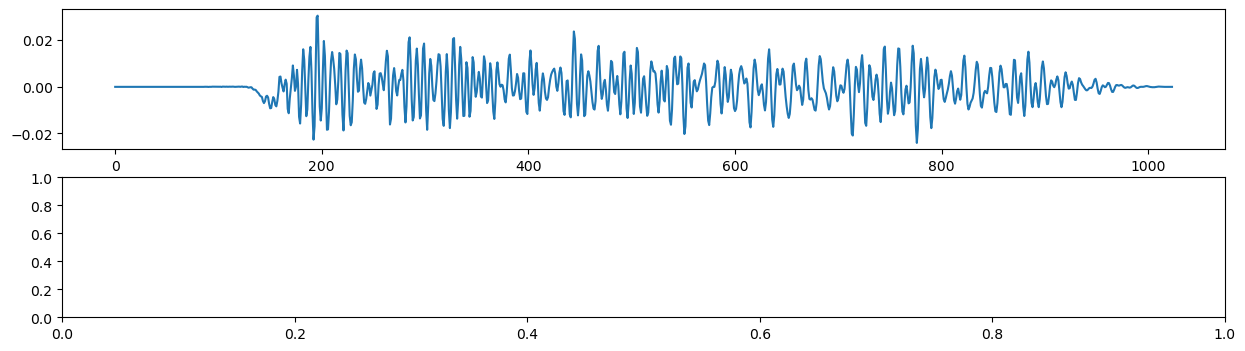

In [126]:
# demean and taper data
from pylops.utils.tapers import taper

event_data_mean = np.mean(event_data)
tap = taper(event_data.size, 201, 'hanning')
event_data_tap = (event_data - event_data_mean)* tap
dm_spec, freq = return_spectrum((event_data - event_data_mean), dt, fwin=nfft)

fig,axs = plt.subplots(2,1,figsize=[15,4])
axs[0].plot(event_data_tap)

(0.0, 10.0)

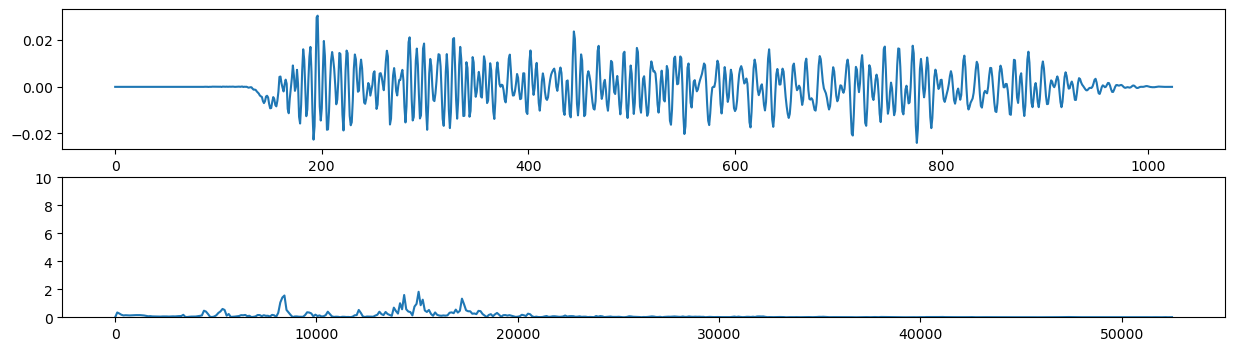

In [128]:
spec, freq = return_spectrum(event_data_tap, dt, fwin=nfft)

fig,axs = plt.subplots(2,1,figsize=[15,4])
axs[0].plot(event_data_tap)
axs[1].plot(freq,spec)
# axs[1].set_xlim(1,1000)
axs[1].set_ylim(0,10)

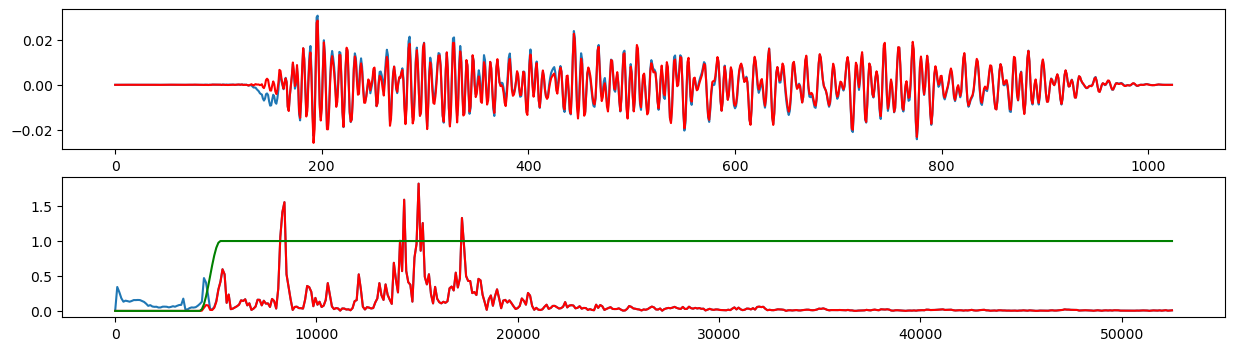

In [102]:
event_data_tap_f = np.fft.rfft(event_data_tap, n=nfft)

tap = taper(nfft//2+1, 11, 'hanning')
tap = np.pad(tap, (41, 0))[:-41]
tap[nfft//4:] = 1.

event_data_tap_filt_f = event_data_tap_f * tap
event_data_tap_filt = np.fft.irfft(event_data_tap_filt_f, n=nfft)

fig,axs = plt.subplots(2,1,figsize=[15,4])
axs[0].plot(event_data_tap)
axs[0].plot(event_data_tap_filt, 'r')
axs[1].plot(freq,np.abs(event_data_tap_f))
axs[1].plot(freq,np.abs(event_data_tap_filt_f), 'r')
axs[1].plot(freq, tap, 'g')
# axs[1].set_xlim(1,1000)
#axs[1].set_ylim(0,10)

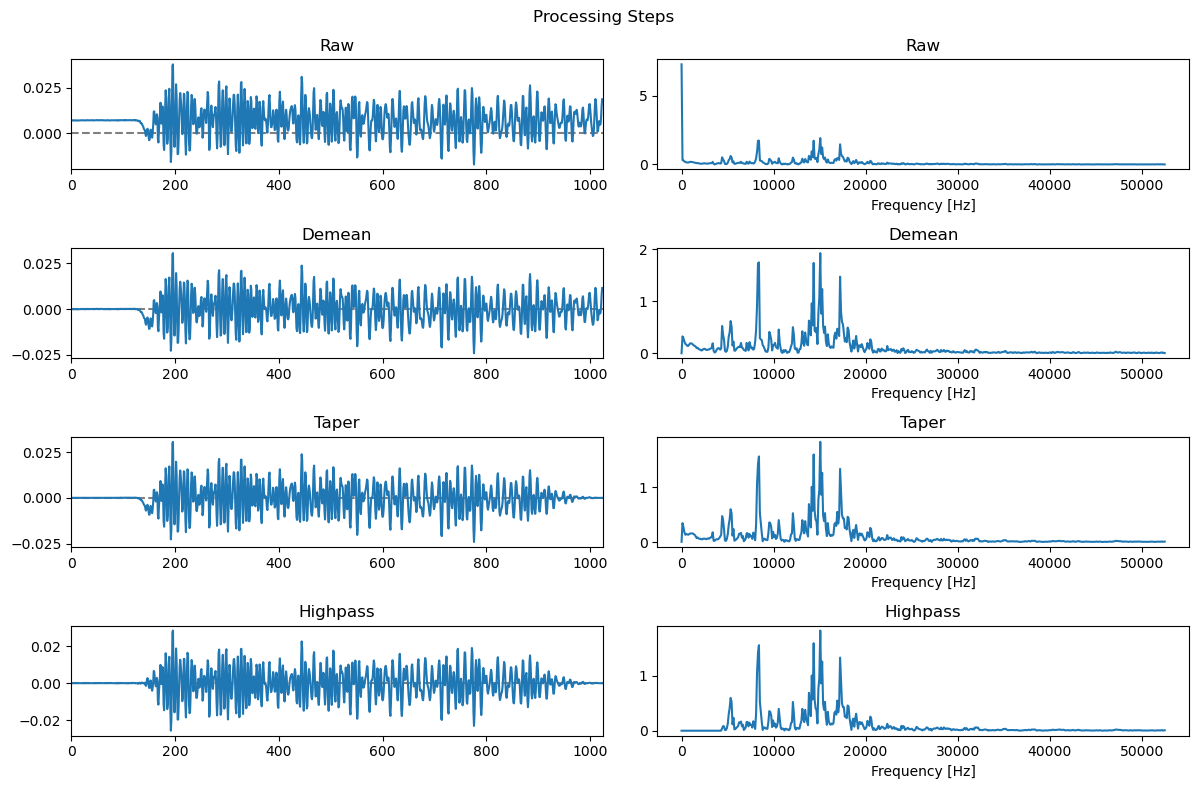

In [134]:
fig,axs = plt.subplots(4,2,figsize=[12,8])
# TIME DOMAIN
for ax in axs[:,0]:ax.axhline(0, c='gray', ls='--'), ax.set_xlim([0,nfft])
axs[0,0].plot(event_data)
axs[1,0].plot((event_data - event_data_mean))
axs[2,0].plot(event_data_tap)
axs[3,0].plot(event_data_tap_filt)

axs[0,0].set_title('Raw')
axs[1,0].set_title('Demean')
axs[2,0].set_title('Taper')
axs[3,0].set_title('Highpass')

# F DOMAIN
axs[0,1].plot(freq,o_spec)
axs[1,1].plot(freq,dm_spec)
axs[2,1].plot(freq,np.abs(event_data_tap_f))
axs[3,1].plot(freq,np.abs(event_data_tap_filt_f))
for ax in axs[:,1]:ax.set_xlabel('Frequency [Hz]')
axs[0,1].set_title('Raw')
axs[1,1].set_title('Demean')
axs[2,1].set_title('Taper')
axs[3,1].set_title('Highpass')
fig.suptitle('Processing Steps')

fig.tight_layout()